<a href="https://colab.research.google.com/github/bhaveleena3/Python/blob/main/Forcasting_Airline_assign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from math import sqrt

In [2]:
airlines=pd.read_excel('/content/Airlines+Data.xlsx')

In [3]:
airlines

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


<Axes: >

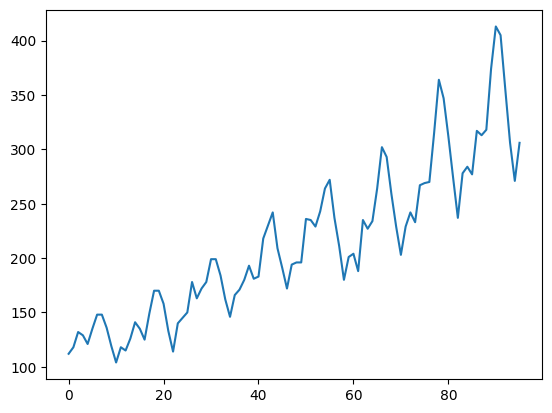

In [4]:
airlines.Passengers.plot()

In [5]:
airlines.isna().sum()

Month         0
Passengers    0
dtype: int64

In [6]:
airlines.dtypes

Month         datetime64[ns]
Passengers             int64
dtype: object

In [7]:
airlines.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [8]:
airlines.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


<Axes: xlabel='Month', ylabel='Passengers'>

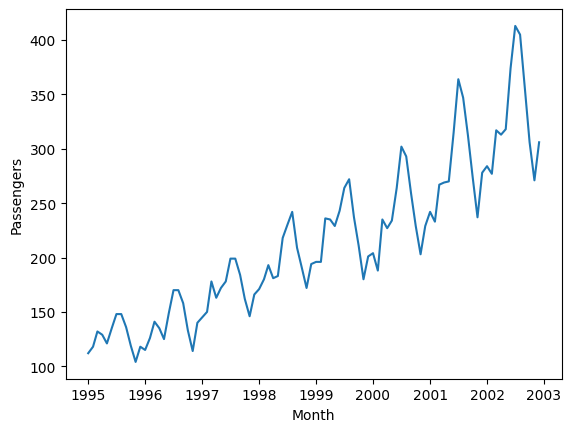

In [9]:
sns.lineplot(x="Month", y="Passengers", data=airlines)

<Axes: >

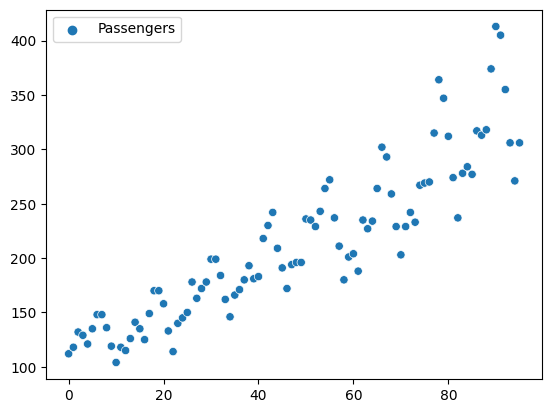

In [10]:
sns.scatterplot(airlines)

In [11]:
airlines.set_index('Month',inplace=True)
airlines.index.year
airlines.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


In [12]:
airlines[airlines.duplicated()].shape

(16, 1)

In [13]:
airlines.drop_duplicates(inplace=True)

In [14]:
airlines

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-07-01,413
2002-08-01,405
2002-09-01,355


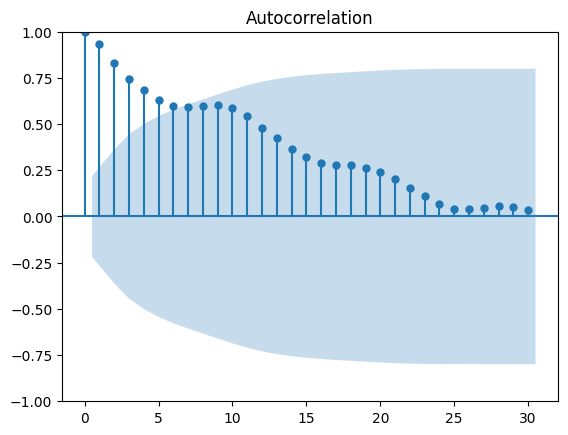

In [15]:
#Autocorrelation Plot
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(airlines,lags=30)
plt.show()

In [16]:
upsampled = airlines.resample('M').mean()
print(upsampled.head(32))

            Passengers
Month                 
1995-01-31       112.0
1995-02-28       118.0
1995-03-31       132.0
1995-04-30       129.0
1995-05-31       121.0
1995-06-30       135.0
1995-07-31       148.0
1995-08-31         NaN
1995-09-30       136.0
1995-10-31       119.0
1995-11-30       104.0
1995-12-31         NaN
1996-01-31       115.0
1996-02-29       126.0
1996-03-31       141.0
1996-04-30         NaN
1996-05-31       125.0
1996-06-30       149.0
1996-07-31       170.0
1996-08-31         NaN
1996-09-30       158.0
1996-10-31       133.0
1996-11-30       114.0
1996-12-31       140.0
1997-01-31       145.0
1997-02-28       150.0
1997-03-31       178.0
1997-04-30       163.0
1997-05-31       172.0
1997-06-30         NaN
1997-07-31       199.0
1997-08-31         NaN


            Passengers
Month                 
1995-01-31       112.0
1995-02-28       118.0
1995-03-31       132.0
1995-04-30       129.0
1995-05-31       121.0
1995-06-30       135.0
1995-07-31       148.0
1995-08-31       142.0
1995-09-30       136.0
1995-10-31       119.0
1995-11-30       104.0
1995-12-31       109.5
1996-01-31       115.0
1996-02-29       126.0
1996-03-31       141.0


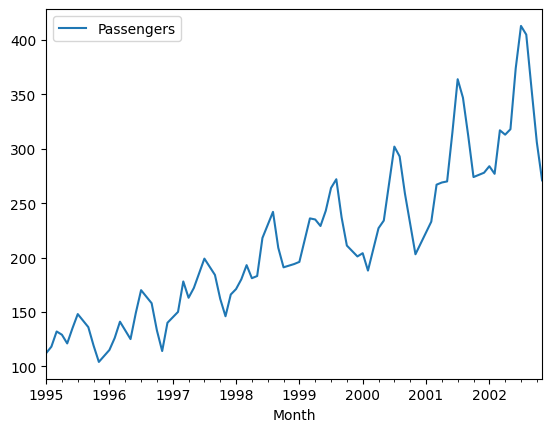

In [17]:
interpolated = upsampled.interpolate(method='linear') ## interplation was done for nan values which we get after doing upsampling by month
print(interpolated.head(15))
interpolated.plot()
plt.show()

In [18]:
interpolated

,Passengers
Month,
1995-01-31,112.0
1995-02-28,118.0
1995-03-31,132.0
1995-04-30,129.0
1995-05-31,121.0
...,...
2002-07-31,413.0
2002-08-31,405.0
2002-09-30,355.0


In [19]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

    # Determine rolling statistics
    movingAverage = timeseries.rolling(window=4).mean()
    movingSTD = timeseries.rolling(window=4).std()

    # Plot rolling statistics
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    plt.legend(loc='best')
    plt.title('Rolling Mean')
    plt.show(block=False)

    # Perform Dickey–Fuller test:
    print('Results of Dickey Fuller Test:')
    dftest = adfuller(timeseries['Passengers'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

In [20]:
def adf_test(series):
    result = adfuller(series.dropna())
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    if result[1] <= 0.05:
        print("Reject the null hypothesis")
        print("Data is stationary")
    else:
        print("Fail to reject the null hypothesis")
        print("Data is non-stationary")

**Feature Scaling (Transformations)**

1. Square Root Transform

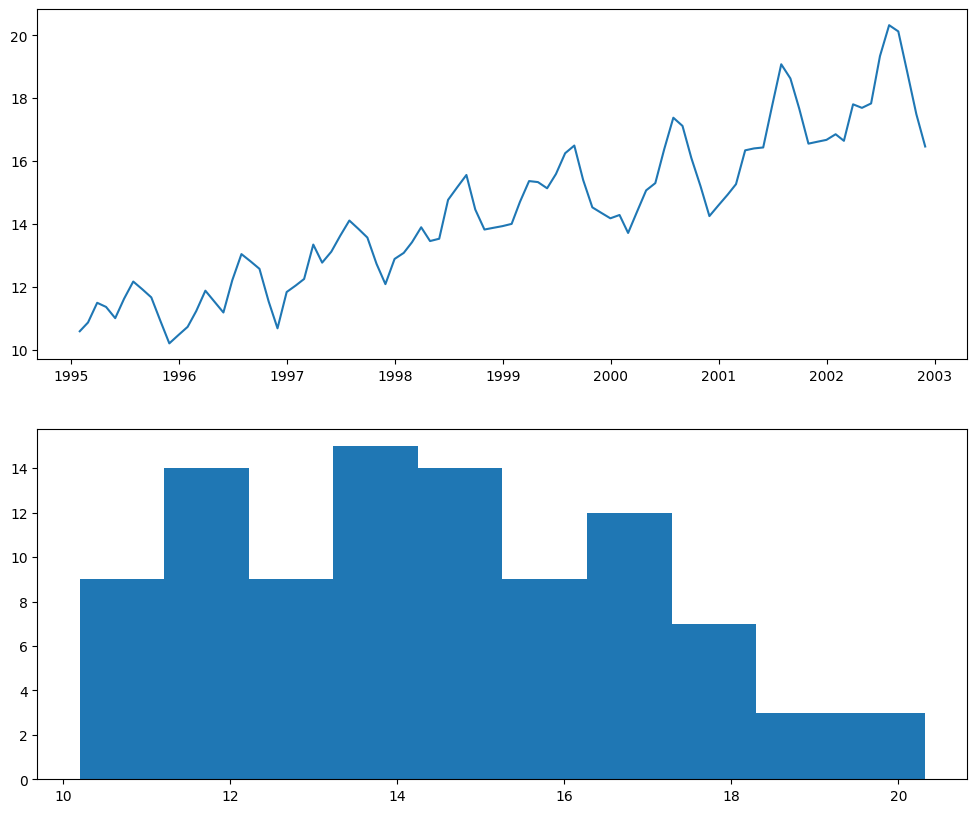

In [23]:
import numpy as np
square_root = pd.DataFrame()
square_root = interpolated[['Passengers']]
square_root['Passengers'] = np.sqrt(square_root.Passengers)

# line chart
fig=plt.figure(figsize=(12,10))
plt.subplot(211)
plt.plot(square_root['Passengers'])

# Histogram
plt.subplot(212)
plt.hist(square_root['Passengers'])
plt.show()

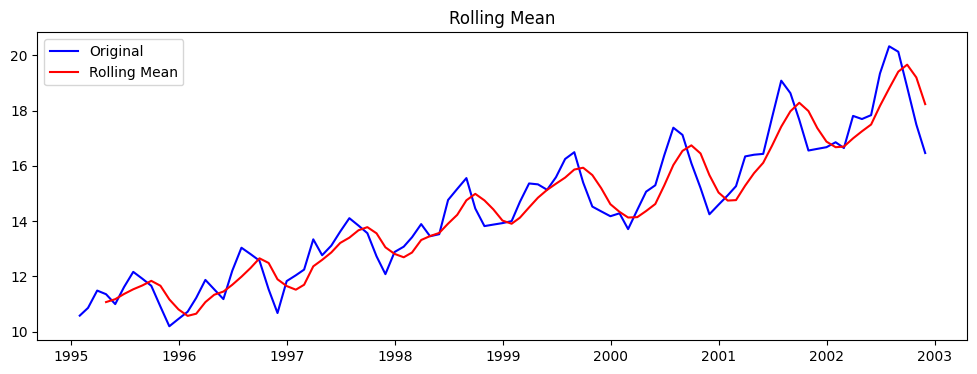

Results of Dickey Fuller Test:
Test Statistic                 -0.248971
p-value                         0.932427
#Lags Used                     12.000000
Number of Observations Used    82.000000
Critical Value (1%)            -3.512738
Critical Value (5%)            -2.897490
Critical Value (10%)           -2.585949
dtype: float64


In [24]:
plt.figure(figsize=(12,4))
test_stationarity(square_root)

In [25]:
adf_test(square_root.Passengers)

Fail to reject the null hypothesis
Data is non-stationary


Log Transform

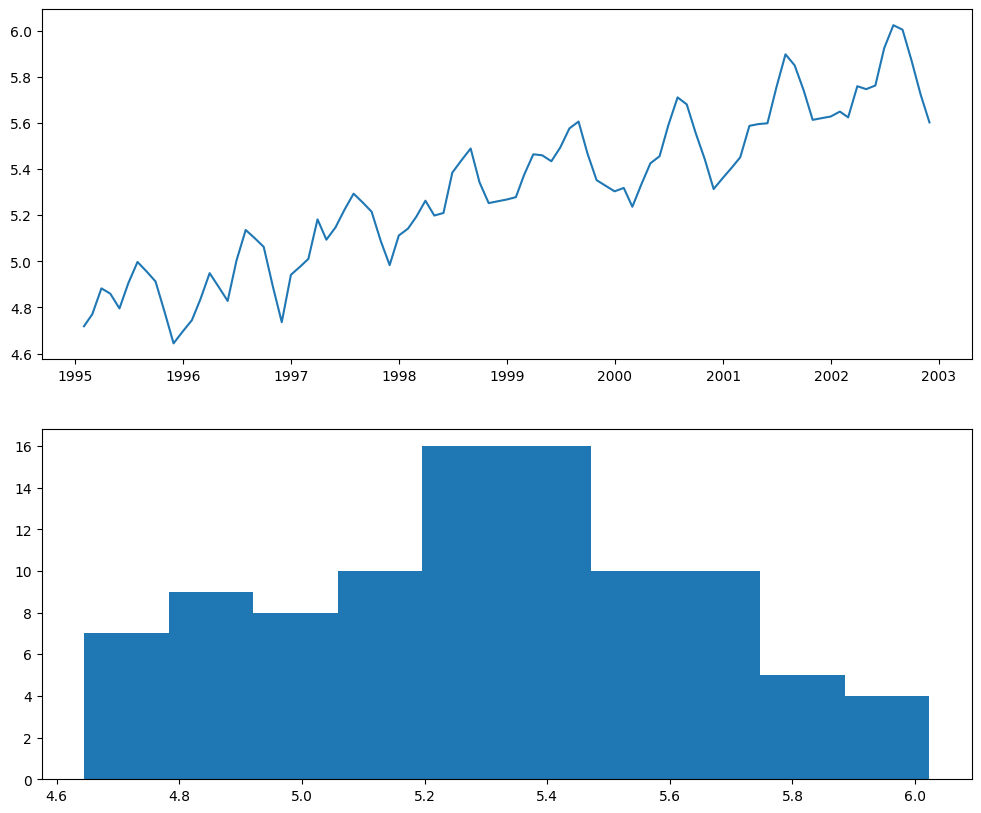

In [26]:
log = pd.DataFrame()
log = interpolated[['Passengers']]
log['Passengers'] = np.log(log.Passengers)

# line chart
fig=plt.figure(figsize=(12,10))
plt.subplot(211)
plt.plot(log['Passengers'])

# Histogram
plt.subplot(212)
plt.hist(log['Passengers'])
plt.show()

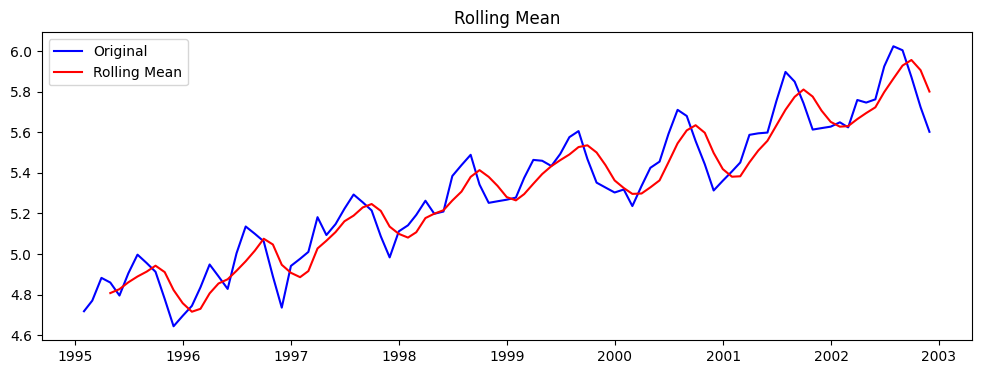

Results of Dickey Fuller Test:
Test Statistic                 -0.995368
p-value                         0.754950
#Lags Used                     12.000000
Number of Observations Used    82.000000
Critical Value (1%)            -3.512738
Critical Value (5%)            -2.897490
Critical Value (10%)           -2.585949
dtype: float64


In [29]:
plt.figure(figsize=(12,4))
test_stationarity(log)


In [31]:
adf_test(log.Passengers)

Fail to reject the null hypothesis
Data is non-stationary


In [32]:
import numpy as np

def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

In [33]:
# Splitting Train and Test Data
Train = interpolated.head(81)
Test = interpolated.tail(14)

Simple Exponential Method

In [34]:
ses_model = SimpleExpSmoothing(Train['Passengers']).fit(optimized=True)
pred_ses = ses_model.predict(start = Test.index[0],end=Test.index[-1])
rmse_ses = sqrt(mean_squared_error(pred_ses,Test.Passengers))
mape_ses = MAPE(pred_ses,Test['Passengers'])
print('Simple Exponential Method Evaluation',"\n",\
'Mean Absolute Percent Error   = {}'.format(mape_ses),"\n",\
'Root Mean Squared Error = {}'.format(rmse_ses))


Simple Exponential Method Evaluation 
 Mean Absolute Percent Error   = 11.329909311613418 
 Root Mean Squared Error = 47.97841769482953


Holt Method

In [44]:
# Holt method
hw_model = Holt(Train["Passengers"]).fit(smoothing_level=0.1, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
rmse_hw = sqrt(mean_squared_error(pred_hw,Test.Passengers))
mape_hw = MAPE(pred_hw,Test.Passengers)
print('Holt Method ',"\n",\
'Mean Absolute Percent Error   = {}'.format(mape_hw),"\n",\
'Root Mean Squared Error = {}'.format(rmse_hw))

Holt Method  
 Mean Absolute Percent Error   = 12.248038050026105 
 Root Mean Squared Error = 45.456406151357996


<ipython-input-44-6b062eab6942>:2: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  hw_model = Holt(Train["Passengers"]).fit(smoothing_level=0.1, smoothing_slope=0.2)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


Holts winter exponential smoothing with additive seasonality and additive trend

In [46]:
hwe_model_add_add = ExponentialSmoothing(Train["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit(smoothing_level=0.1, smoothing_slope=0.2) #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
mape_hwe_add_add = MAPE(pred_hwe_add_add,Test.Passengers)
rmse_hwe_add_add = sqrt(mean_squared_error(pred_hwe_add_add,Test.Passengers))
print('Holt winter exponential smoothing with additive seasonality and additive trend Method ',"\n",\
'Mean Absolute Percent Error   = {}'.format(mape_hwe_add_add),"\n",\
'Root Mean Squared Error = {}'.format(rmse_hwe_add_add))

Holt winter exponential smoothing with additive seasonality and additive trend Method  
 Mean Absolute Percent Error   = 3.5137304889870413 
 Root Mean Squared Error = 14.833674717854102


<ipython-input-46-88cc22f8e702>:1: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  hwe_model_add_add = ExponentialSmoothing(Train["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit(smoothing_level=0.1, smoothing_slope=0.2) #add the trend to the model


Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [55]:
hwe_model_mul_add = ExponentialSmoothing(Train["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit(smoothing_level=0.1, smoothing_slope=0.2)
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
mape_hwe_mul_add = MAPE(pred_hwe_mul_add,Test.Passengers)
rmse_hwe_mul_add = sqrt(mean_squared_error(pred_hwe_mul_add,Test.Passengers))
print('Holt winter exponential smoothing with multiplicative seasonality and additive trend Method ',"\n",\
'Mean Absolute Percent Error   = {}'.format(mape_hwe_mul_add),"\n",\
'Root Mean Squared Error = {}'.format(rmse_hwe_mul_add))


Holt winter exponential smoothing with multiplicative seasonality and additive trend Method  
 Mean Absolute Percent Error   = 3.2332633659559704 
 Root Mean Squared Error = 12.632692039692808


<ipython-input-55-392cfcd105b2>:1: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  hwe_model_mul_add = ExponentialSmoothing(Train["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit(smoothing_level=0.1, smoothing_slope=0.2)


In [56]:
# Comparing the results
Evaluation = {"Models":pd.Series(["Simple_Exp","Holt_Exp","Holt_Exp_Add_seasonality_add_trend","Holt_Exp_Mul_Seasonality_Add_trend"]),
             "MAPE(%)":pd.Series([mape_ses,mape_hw,mape_hwe_add_add,mape_hwe_mul_add]),
        "RMSE_Values":pd.Series([rmse_ses,rmse_hw,rmse_hwe_add_add,rmse_hwe_mul_add])}
table_evaluation=pd.DataFrame(Evaluation)
table_evaluation.sort_values(['MAPE(%)'], inplace=True, ignore_index=True)
table_evaluation

,Models,MAPE(%),RMSE_Values
0,Holt_Exp_Mul_Seasonality_Add_trend,3.233263,12.632692
1,Holt_Exp_Add_seasonality_add_trend,3.513730,14.833675
2,Simple_Exp,11.329909,45.456406
3,Holt_Exp,12.248038,45.456406


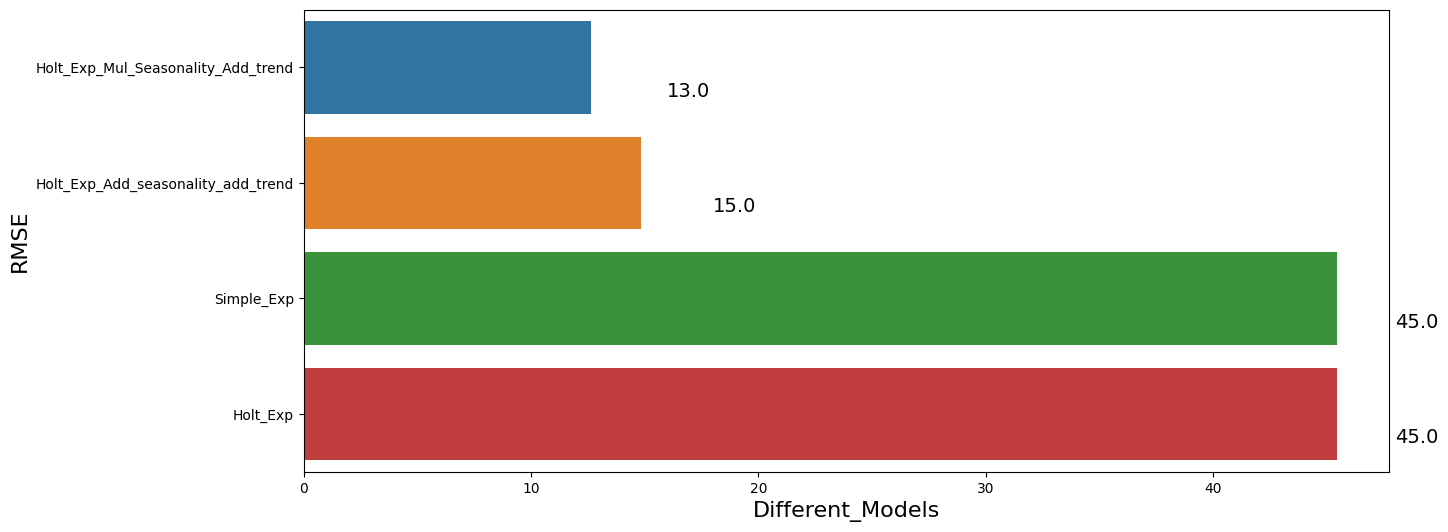

In [57]:
f, axe = plt.subplots(1,1, figsize=(14,6))
sns.barplot(x='RMSE_Values', y='Models', data=table_evaluation, ax = axe)
axe.set_xlabel('Different_Models', size=16)
axe.set_ylabel('RMSE', size=16)

for i, v in enumerate(np.round(table_evaluation.RMSE_Values.values,0)):
    axe.text(v + 3, i + .25, str(v), fontsize= 14)
plt.show()

# **Conclusion :**

Holt Exponential Method with Multiplicative Seasonality and Additive Trend

The best model we have got so far with the lowest RMSE and lowest MAPE.